In [ ]:
!pip install Sastrawi
!pip install emoji
!pip install gensim
!pip install wordcloud

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 209.7/209.7 kB 7.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 608.4/608.4 kB 16.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27.9/27.9 MB 53.0 MB/s eta 0:00:00


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
import re
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Memuat Dataset
df = pd.read_csv('youtube-comments-KECURANGAN-PEMILU.csv')
df.head()

Date                     UserName  \
0  2025-10-10T16:57:17Z  @yoyokaldifelaniindosat5345   
1  2025-10-10T16:51:49Z  @yoyokaldifelaniindosat5345   
2  2025-10-10T15:58:22Z  @yoyokaldifelaniindosat5345   
3  2025-09-16T15:53:59Z               @buyungmsc2368   
4  2025-09-09T02:25:38Z           @BambangIrawan-r7t   

                                             Comment  Like  
0                         Einstein : üòí Lavoisier : üòí     0  
1                                     Openheimer : üòí     0  
2  hrus nya sprti ni jawaban jokowi, gibran & Ter...     0  
3                                 QODARI JILAT TERUS     0  
4  Saat Qodari menjawab pertanyaan Tejo lalu bung...     0

In [ ]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40457 entries, 0 to 40456
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      40457 non-null  object
 1   UserName  40455 non-null  object
 2   Comment   40427 non-null  object
 3   Like      40457 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = df.dropna()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40425 entries, 0 to 40456
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      40425 non-null  object
 1   UserName  40425 non-null  object
 2   Comment   40425 non-null  object
 3   Like      40425 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Memeriksa dataset apakah ada duplikat
clean_df.duplicated().sum()

np.int64(17)

In [ ]:
# Menghapus baris duplikat dari Dataframe
clean_df = clean_df.drop_duplicates()

# Preprocessing Text

In [ ]:
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Menghapus mention
  text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Menghapus hastag
  text = re.sub(r'RT[\s]+', '', text)  # Menghapus RT
  text = re.sub(r"https\S+", '', text)  # Menghapus link
  text = re.sub(r'[0-9]+', '', text)   # Menghapus angka
  text = re.sub(r'[^\w\s]', '', text)  # Menghapus karakter
  text = text.replace('\n', ' ')  # Mengganti baris baru dengan spasi
  text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
  text = text.strip(' ')   # Menghapus karakter spasi dari kiri dan kanan teks
  return text

def remove_emoji(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    else:
        return text

def caseFoldingText(text):     # Mengubah semua karakter dalam teks menjadi hurup kecil
    text = text.lower()
    return text

def tokenizingText(text):      # Memecah atau membagi string teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(["yang", "dan", "di", "ke", "dari", "itu", "ini", "saya", "kamu", "untuk", "pada", "dengan", "ada", "tidak", "ya", "kok", "sih", "atau",'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []

    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text =  filtered
    return text

def stemmingText(text):
  # Membuat obej stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap data dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah di stemming menjadi satu teks
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentece(list_words):  # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join( word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan text dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Comment'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(caseFoldingText)

# Mneghapus emoji
clean_df['text_removeEmoji'] = clean_df['text_casefoldingText'].apply(remove_emoji)

# Mengganti kata-kata slang dengan kata-kata standar dan meyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_removeEmoji'].apply(fix_slangwords)

# Memecah teks menjadi token(kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop(kata-kata umum) dan menyimpannya di text_stopword
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentece)

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
    next(reader) # Skip header row

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter='\t')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
    next(reader) # Skip header row

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):

    # Inisialisasi skor sentimen 0
    score = 0

    # Mengulangi setiap kata dalam teks
    for word in text:
        if (word in lexicon_positive):
          score = score + lexicon_positive[word]  # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:    # Mengualangi setiap kata dalam teks(sekali lagi)
        if (word in lexicon_negative):
          score = score + lexicon_negative[word]  # Jika kata ada dalam kamus negatif, tambahkan skornya ke skor sentimen

    # Inisialisasi variabel polaritas
    polarity = ''

    if (score > 0):
        polarity = 'positive'   # Jika skor sentimen lebih dari 0, maka polaritas adalah positive
    elif (score < 0):
        polarity = 'negative'   # Jika skor sentimen kurang dari 0, maka polaritas adalah negative
    else:
        polarity = 'neutral'    # Jika skor sentimen adalah 0, maka polaritas adalah neutral

    return score, polarity    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
# Pisahkan skor sentimen dan polaritas
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    19461
positive    11124
neutral      9823
Name: count, dtype: int64


In [ ]:
# Mengecekk missing values
missing_values = clean_df.isnull().sum()
print("Mising values: ", missing_values)

Mising values:  Date                    0
UserName                0
Comment                 0
Like                    0
text_clean              0
text_casefoldingText    0
text_removeEmoji        0
text_slangwords         0
text_tokenizingText     0
text_stopword           0
text_akhir              0
polarity_score          0
polarity                0
dtype: int64


In [ ]:
clean_df.head(20)

Date                     UserName  \
0   2025-10-10T16:57:17Z  @yoyokaldifelaniindosat5345   
1   2025-10-10T16:51:49Z  @yoyokaldifelaniindosat5345   
2   2025-10-10T15:58:22Z  @yoyokaldifelaniindosat5345   
3   2025-09-16T15:53:59Z               @buyungmsc2368   
4   2025-09-09T02:25:38Z           @BambangIrawan-r7t   
5   2025-08-20T15:55:11Z                @zerohero-e7e   
6   2025-08-17T01:01:19Z                @Buhari-cj4go   
7   2025-07-15T18:50:50Z               @dickyyoga4756   
8   2025-07-15T09:25:22Z            @sandraoreski5542   
9   2025-07-14T18:01:00Z             @Dediibrahim-w1q   
10  2025-07-14T17:49:04Z             @Dediibrahim-w1q   
11  2025-07-14T17:27:39Z             @Dediibrahim-w1q   
12  2025-07-14T17:26:52Z             @Dediibrahim-w1q   
13  2025-07-13T14:19:23Z                  @KosimCilok   
14  2025-07-13T04:54:49Z         @rivaldofernando8678   
15  2025-07-12T17:28:47Z                 @Sriyadi-e6g   
16  2025-07-12T09:15:57Z                 @ElElyon-l5y   
17  2025-07-07T17:52:49Z                @alcatras9308   
18  2025-06-30T02:47:48Z             @DesiPratiwihadi   
19  2025-06-23T18:04:12Z         @penegakkeadilan2069   

                                              Comment  Like  \
0                          Einstein : üòí Lavoisier : üòí     0   
1                                      Openheimer : üòí     0   
2   hrus nya sprti ni jawaban jokowi, gibran & Ter...     0   
3                                  QODARI JILAT TERUS     0   
4   Saat Qodari menjawab pertanyaan Tejo lalu bung...     0   
5                              Njirr kodari... Amit2üòÇ     0   
6   Kasihan melihat orang orang ini yg gagal menja...     0   
7   Sayang sekali td tdk diterusin tentang ijazah ...     0   
8   Go  to  theatre  acctors,  wrong speach  is  l...     0   
9                         Gak malu si haikal ini.....     0   
10                         Penjilat ya tetap penjilat     0   
11           Dapat apa la si sodara sam si haikal ini     0   
12            Jijik x aku liat si haikal ini sekarang     0   
13                     Qodari manusian setengah setan     0   
14                          Qdary si penjilat ulang üî•     0   
15                                      Ah ngapusi...     0   
16        Si rocky gekar cuma s1 taoi ngaku¬≤ profesor     0   
17                           Babe haikal babak belurüòÇ     0   
18  Dari awal ga pernah milih Jokowi sih kaya udah...     0   
19                          Byk pengkhianat NKRI !!!!     0   

                                           text_clean  \
0                                Einstein   Lavoisier   
1                                          Openheimer   
2   hrus nya sprti ni jawaban jokowi gibran  Termu...   
3                                  QODARI JILAT TERUS   
4   Saat Qodari menjawab pertanyaan Tejo lalu bung...   
5                                   Njirr kodari Amit   
6   Kasihan melihat orang orang ini yg gagal menja...   
7   Sayang sekali td tdk diterusin tentang ijazah ...   
8   Go  to  theatre  acctors  wrong speach  is  lu...   
9                              Gak malu si haikal ini   
10                         Penjilat ya tetap penjilat   
11           Dapat apa la si sodara sam si haikal ini   
12            Jijik x aku liat si haikal ini sekarang   
13                     Qodari manusian setengah setan   
14                            Qdary si penjilat ulang   
15                                         Ah ngapusi   
16         Si rocky gekar cuma s taoi ngaku¬≤ profesor   
17                            Babe haikal babak belur   
18  Dari awal ga pernah milih Jokowi sih kaya udah...   
19                               Byk pengkhianat NKRI   

                                 text_casefoldingText  \
0                                einstein   lavoisier   
1                                          openheimer   
2   hrus nya sprti ni jawaban jokowi gibran  termu...   
3                                  qodari jilat teru

In [ ]:
# Menyimpan Dataset yang sudah bersih
clean_df.to_csv("Dataset_Cleaning_Sentimen.csv", index=False)

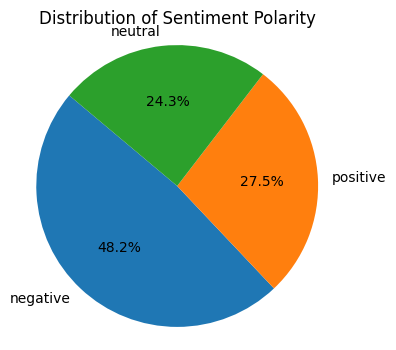

In [ ]:
# Membuat visualisasi dari polarity dengan pie Chart
polarity_counts = clean_df['polarity'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Polarity')
plt.axis('equal')
plt.show()

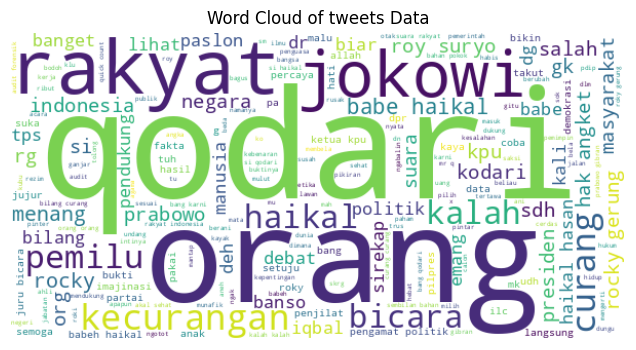

In [ ]:
# Visualisasi deng WordCloud
from wordcloud import WordCloud

# Join all the cleaned text into a single string
all_text = ' '.join(clean_df['text_akhir'])

# Generate the wordcloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(all_text)

# Display the wordcloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of tweets Data')
plt.axis('off')
plt.show()

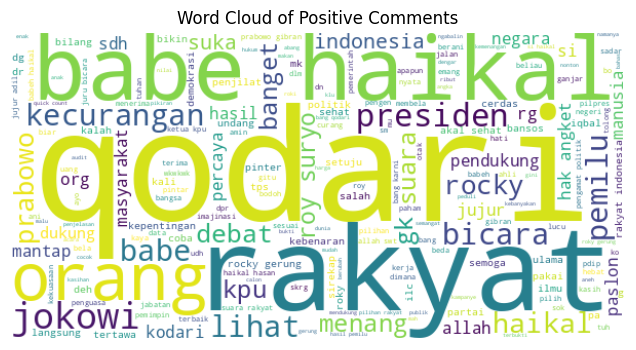

In [ ]:
# Filter comments by polarity
positive_comments = clean_df[clean_df['polarity'] == 'positive']['text_akhir']


# Generate Word Cloud for Positive Comments
if not positive_comments.empty:
    positive_text = ' '.join(positive_comments)
    positive_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(positive_text)

    plt.figure(figsize=(8, 4))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Positive Comments')
    plt.axis('off')
    plt.show()
else:
    print("No positive comments to generate word cloud.")

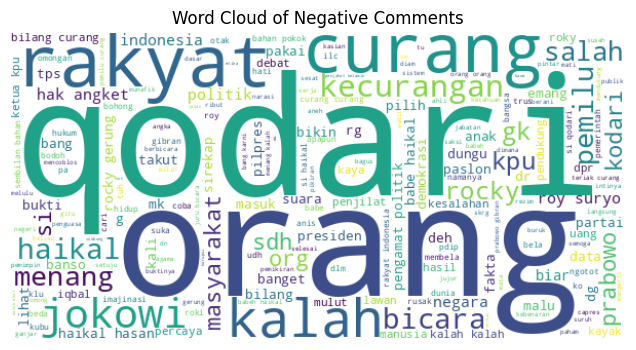

In [ ]:
# Filter comments by polarity
negative_comments = clean_df[clean_df['polarity'] == 'negative']['text_akhir']

# Generate Word Cloud for Negative Comments
if not negative_comments.empty:
    negative_text = ' '.join(negative_comments)
    negative_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(negative_text)

    plt.figure(figsize=(8, 4))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Negative Comments')
    plt.axis('off')
    plt.show()
else:
    print("No negative comments to generate word cloud.")

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF (80:20)

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=20000, min_df=20, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

# Menerapkan SMOTE *after* TF-IDF
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Spilitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
! pip install optuna
import optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 400.9/400.9 kB 13.2 MB/s eta 0:00:00


# Modeling dengan Algoritma SVC + TF-IDF + OPTUNA

In [ ]:

def objective(trial):
    # Mendefiniskan ruang pencarian untuk hyperparameter
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e2, log=True),
        'loss': trial.suggest_categorical('loss', ['hinge', 'squared_hinge']),
        # Toleransi untuk kriteria berhenti
        'tol': trial.suggest_float('tol', 1e-5, 1e-1, log=True),
        # Diperlukan untuk reproduktifitas
        'random_state': 42,
        # Meningkatkan iterasi maksimum untuk memastikan konvergensi
        'max_iter': 5000
    }
    # Membuat model dengan hyperparameter yang disarankan oleh "trial"
    model_svc_tfidf = LinearSVC(**params)

    # Buat Cross Validation pada data training
    scores = cross_val_score(model_svc_tfidf, X_train, y_train, cv=3, scoring='accuracy') # Reduced cross-validation folds

    # Ambil rata-rata akurasi dari semua fold
    accuracy = np.mean(scores)

    # Return nilai akurasi sebagai tujuan optimasi
    return accuracy

# Menjalankan Optimasi
study = optuna.create_study(direction='maximize', study_name='LinearSVC')
study.optimize(objective, n_trials=200,timeout=300*12) # berhenti jika 1 jam belum selesai

# Hasil Optimasi
print('Number of finished trials:', len(study.trials))
# Menampilkan trial terbaik
best_trial = study.best_trial
print(f"\nSkor Akurasi (CV) Terbaik: {best_trial.value:.4f}")
print("Hyperparameter Terbaik:")
for key, value in best_trial.params.items():
    print(f"  - {key}: {value}")

# Melatih model final dengan hyperparameter terbaik pada SELURUH data latih
final_model_svc_tfidf = LinearSVC(**best_trial.params, random_state=42, max_iter=5000)
final_model_svc_tfidf.fit(X_train, y_train)

# Evaluasi akhir pada data uji (test set)
final_accuracy = final_model_svc_tfidf.score(X_test, y_test)
print(f"\nAkurasi model final di data test: {final_accuracy:.4f}")

[I 2025-10-21 04:29:16,791] A new study created in memory with name: LinearSVC
[I 2025-10-21 04:29:18,763] Trial 0 finished with value: 0.7403972865127514 and parameters: {'C': 0.001305024016261104, 'loss': 'hinge', 'tol': 0.0002274920463601101}. Best is trial 0 with value: 0.7403972865127514.
[I 2025-10-21 04:29:20,573] Trial 1 finished with value: 0.7375925195998381 and parameters: {'C': 0.0010216787761218732, 'loss': 'hinge', 'tol': 3.0837535352782724e-05}. Best is trial 0 with value: 0.7403972865127514.
[I 2025-10-21 04:29:21,493] Trial 2 finished with value: 0.7264161510592229 and parameters: {'C': 0.005267952165780961, 'loss': 'squared_hinge', 'tol': 0.03590833301961197}. Best is trial 0 with value: 0.7403972865127514.
[I 2025-10-21 04:29:22,384] Trial 3 finished with value: 0.6538130982785227 and parameters: {'C': 0.0001461569530697371, 'loss': 'squared_hinge', 'tol': 0.0049259948476285155}. Best is trial 0 with value: 0.7403972865127514.
[I 2025-10-21 04:29:23,304] Trial 4 fini

Number of finished trials: 167

Skor Akurasi (CV) Terbaik: 0.8742
Hyperparameter Terbaik:
  - C: 65.12092439213272
  - loss: hinge
  - tol: 0.000510836864031013

Akurasi model final di data test: 0.8873


In [ ]:
# save model linear SVC + TFIDF dengan pickle
import pickle
filename = 'model_linearSVC_tfidf.pkl'
pickle.dump(final_model_svc_tfidf, open(filename, 'wb'))

In [ ]:
# save vectorizer TFIDF
filename = 'vectorizer_tfidf.pkl'
pickle.dump(tfidf, open(filename, 'wb'))

# Ekstraksi fitur dengan BoW  (70:30)

In [ ]:
# Pisahkan Data Train dan Test
X = clean_df['text_akhir']
y = clean_df['polarity']

le = LabelEncoder()
y_le = le.fit_transform(y)

# Ekstraksi fitur dengan Bow
bow = CountVectorizer()
X_bow= bow.fit_transform(X)

# Menerapkan SMOTE
smote_bow = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote_bow.fit_resample(X_bow, y_le)

# Splitting
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_train_sm, y_train_sm, test_size=0.3, random_state=42)

# Modeling dengan Algoritma SVC + BoW + OPTUNA

In [ ]:
def objective(trial):
    # Mendefiniskan ruang pencarian untuk hyperparameter
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e2, log=True),
        'loss': trial.suggest_categorical('loss', ['hinge', 'squared_hinge']),
        # Toleransi untuk kriteria berhenti
        'tol': trial.suggest_float('tol', 1e-5, 1e-1, log=True),
        # Diperlukan untuk reproduktifitas
        'random_state': 42,
        # Meningkatkan iterasi maksimum untuk memastikan konvergensi
        'max_iter': 5000
    }
    # Membuat model dengan hyperparameter yang disarankan oleh "trial"
    model = LinearSVC(**params)

    # Buat Cross Validation pada data training
    scores = cross_val_score(model, X_train_bow, y_train_bow, cv=5, scoring='accuracy') # Reduced cross-validation folds

    # Ambil rata-rata akurasi dari semua fold
    accuracy = np.mean(scores)

    # Return nilai akurasi sebagai tujuan optimasi
    return accuracy

# Menjalankan Optimasi
study = optuna.create_study(direction='maximize', study_name='LinearSVC')
study.optimize(objective, n_trials=50,timeout=300*12)

# Hasil Optimasi
print('Number of finished trials:', len(study.trials))
# Menampilkan trial terbaik
best_trial = study.best_trial
print(f"\nSkor Akurasi (CV) Terbaik: {best_trial.value:.4f}")
print("Hyperparameter Terbaik:")
for key, value in best_trial.params.items():
    print(f"  - {key}: {value}")

# Melatih model final dengan hyperparameter terbaik pada SELURUH data latih
final_model = LinearSVC(**best_trial.params, random_state=42, max_iter=5000)
final_model.fit(X_train_bow, y_train_bow)

# Evaluasi akhir pada data uji (test set)
final_accuracy = final_model.score(X_test_bow, y_test_bow)
print(f"\nAkurasi model final di data test: {final_accuracy:.4f}")

[I 2025-10-21 06:21:08,845] A new study created in memory with name: LinearSVC
[I 2025-10-21 06:21:11,608] Trial 0 finished with value: 0.6692031694949063 and parameters: {'C': 0.0004417617017744357, 'loss': 'squared_hinge', 'tol': 2.3770783727321764e-05}. Best is trial 0 with value: 0.6692031694949063.
[I 2025-10-21 06:21:16,611] Trial 1 finished with value: 0.8249486431643624 and parameters: {'C': 0.062176763185072696, 'loss': 'squared_hinge', 'tol': 0.010480106250444973}. Best is trial 1 with value: 0.8249486431643624.
[I 2025-10-21 06:21:20,775] Trial 2 finished with value: 0.6658998484898879 and parameters: {'C': 0.00041174020977948074, 'loss': 'squared_hinge', 'tol': 1.0411931965218883e-05}. Best is trial 1 with value: 0.8249486431643624.
[I 2025-10-21 06:23:49,630] Trial 3 finished with value: 0.8381375192343956 and parameters: {'C': 36.56055798167361, 'loss': 'hinge', 'tol': 0.0002714576633148851}. Best is trial 3 with value: 0.8381375192343956.
[I 2025-10-21 06:23:50,307] Tria

Number of finished trials: 50

Skor Akurasi (CV) Terbaik: 0.8547
Hyperparameter Terbaik:
  - C: 2.1750451486886413
  - loss: hinge
  - tol: 0.004921806008691955

Akurasi model final di data test: 0.8621


# Modeling dengan Algoritma Logistic Regression + TF-IDF + OPTUNA

In [ ]:
# Objective Function untuk Logistic Regression
def objective(trial):
    # Definisikan ruang pencarian untuk Logistic Regression
    params = {
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'random_state': 42,
        'max_iter': 200
    }

    # Penyesuaian: 'liblinear' tidak mendukung penalty 'none' di beberapa versi
    if params['solver'] == 'liblinear' and params['penalty'] == 'l1':
        pass # liblinear mendukung l1
    elif params['solver'] == 'liblinear' and params['penalty'] == 'l2':
        pass # liblinear mendukung l2
    elif params['solver'] == 'saga':
        pass # saga mendukung l1 dan l2
    else: # Jika kombinasi tidak valid, Optuna akan coba lagi
        pass

    # Buat model
    model_lr = LogisticRegression(**params)

    # Lakukan Cross-Validation pada data training
    scores = cross_val_score(model_lr, X_train, y_train, cv=3, scoring='accuracy')
    accuracy = np.mean(scores)

    return accuracy

# Menjalankan Studi Optimisasi
study = optuna.create_study(direction='maximize', study_name='logistic_regression')
study.optimize(objective, n_trials=50,timeout=300*12)

# Analisis dan Evaluasi Final
best_trial = study.best_trial
print(f"\nSkor Akurasi (CV) Terbaik: {best_trial.value:.4f}")
print("Hyperparameter Terbaik:")
for key, value in best_trial.params.items():
    print(f"  - {key}: {value}")


# Melatih model final dengan parameter terbaik
print("Melatih model final pada data training...")
final_model_lr = LogisticRegression(**best_trial.params, random_state=42, max_iter=200)
final_model_lr.fit(X_train, y_train)

# Evaluasi akhir pada data uji (X_test)
final_accuracy_lr = final_model_lr.score(X_test, y_test)
print(f"\nAkurasi model final di data test: {final_accuracy_lr:.4f}")

[I 2025-10-24 05:17:05,176] A new study created in memory with name: logistic_regression
[I 2025-10-24 05:17:08,960] Trial 0 finished with value: 0.751102636329592 and parameters: {'C': 0.13844834915396925, 'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.751102636329592.
[I 2025-10-24 05:17:29,108] Trial 1 finished with value: 0.8605532904819535 and parameters: {'C': 59.71121900978756, 'solver': 'saga', 'penalty': 'l2', 'class_weight': None}. Best is trial 1 with value: 0.8605532904819535.
[I 2025-10-24 05:17:29,721] Trial 2 finished with value: 0.7287287931140823 and parameters: {'C': 0.04557865875928704, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8605532904819535.
[I 2025-10-24 05:23:41,281] Trial 3 finished with value: 0.8608316351057415 and parameters: {'C': 55.269829455082295, 'solver': 'saga', 'penalty': 'l1', 'class_weight': None}. Best is trial 3 with value: 0.8608316351057415.


Skor Akurasi (CV) Terbaik: 0.8659
Hyperparameter Terbaik:
  - C: 3.8567449958981466
  - solver: saga
  - penalty: l1
  - class_weight: balanced
Melatih model final pada data training...

Akurasi model final di data test: 0.8751


# Model Deep Learning

In [ ]:
# Import library
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Siapkan parameter
vocab_size = 10000
embedding_dim = 128
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = 20

# Membuat Objek Encoder
encoder = OneHotEncoder()
# Melakukan encoding pada variabel target Y
encoded_data = encoder.fit_transform(clean_df[['polarity']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())
# gabungkan ke data frame
df_fix = pd.concat([clean_df.reset_index(drop=True), encoded_df], axis=1)

In [ ]:

# Splitting data
x_tf = df_fix['text_akhir'].values
y_tf = df_fix[['polarity_negative', 'polarity_neutral', 'polarity_positive']].values


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

#membagi data train sebesar 70% dan test sebesar 30%
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(x_tf , y_tf, test_size=0.2, random_state=42) # Added random_state for reproducibility

# Ensure target variables are float32 after splitting
#Y_train_tf = Y_train_tf.astype(np.float32)
#Y_test_tf = Y_test_tf.astype(np.float32)
# Pastikan data bersih
#X_train_tf = pd.Series(X_train_tf).fillna('').astype(str).values
#X_test_tf = pd.Series(X_test_tf).fillna('').astype(str).values
sekuens_train = tokenizer.texts_to_sequences(X_train_tf)
sekuens_val = tokenizer.texts_to_sequences(X_test_tf)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train_tf)

In [ ]:
# Data sebelum smote
print("Jumlah data sebelum SMOTE:", Y_train_tf.shape[0])

# Data setelah smote
print("Jumlah data setelah SMOTE:", Y_train_sm.shape[0])

Jumlah data sebelum SMOTE: 32326
Jumlah data setelah SMOTE: 46557


In [ ]:
#model untuk train
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,    output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.build(input_shape=( None,None))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=7,
    restore_best_weights=True,
    verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    mode='max',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=0.00001)

print("\nMemulai proses training model")
history = model.fit(X_train_sm, Y_train_sm,
                    epochs=num_epochs,
                    validation_data=(X_test, Y_test_tf),
                    callbacks=[early_stopping, reduce_lr],
                    batch_size=64,
                    verbose=2
                    )

Model: "sequential_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_5 (Embedding)         ‚îÇ (None, None, 128)      ‚îÇ     1,280,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_5 (Bidirectional) ‚îÇ (None, 256)            ‚îÇ       263,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ (None, 3)              ‚îÇ           387 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,576,451 (6.01 MB)

 Trainable params: 1,576,451 (6.01 MB)

 Non-trainable params: 0 (0.00 B)


Memulai proses training model
Epoch 1/20
728/728 - 325s - 446ms/step - accuracy: 0.6601 - loss: 0.7685 - val_accuracy: 0.8422 - val_loss: 0.4976 - learning_rate: 1.0000e-03
Epoch 2/20
728/728 - 315s - 433ms/step - accuracy: 0.7813 - loss: 0.5449 - val_accuracy: 0.8589 - val_loss: 0.4504 - learning_rate: 1.0000e-03
Epoch 3/20
728/728 - 315s - 432ms/step - accuracy: 0.8293 - loss: 0.4335 - val_accuracy: 0.8503 - val_loss: 0.4549 - learning_rate: 1.0000e-03
Epoch 4/20

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
728/728 - 307s - 422ms/step - accuracy: 0.8613 - loss: 0.3515 - val_accuracy: 0.8414 - val_loss: 0.4786 - learning_rate: 1.0000e-03
Epoch 5/20
728/728 - 307s - 422ms/step - accuracy: 0.9117 - loss: 0.2351 - val_accuracy: 0.8215 - val_loss: 0.6015 - learning_rate: 2.0000e-04
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
728/728 - 329s - 452ms/step - accuracy: 0.9266 - loss: 0.1975 - val_accuracy: 0.8163 - 

In [ ]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, Y_test_tf, verbose=0)
print(f"\nAkurasi Model di Data Uji: {accuracy*100:.2f}%")


Akurasi Model di Data Uji: 85.89%


## Inference Pengujian Hasil

In [ ]:
# Buat pengujian model (Logidtic Regresion)
test = "si rocky gekar taoi ngaku¬≤ profesor"  # Sentimen Neutral

X_new = tfidf.transform([test])
prediction = final_model_lr.predict(X_new)
print("Prediksi : ",prediction)

# Konversi hasil numerik ke teks
predicted_label = le.inverse_transform(prediction)
print("Hasil Prediksi : ",predicted_label)

Prediksi :  [1]
Hasil Prediksi :  ['neutral']


In [ ]:
# Buat pengujian model(LinearSVC)
test = "jokowi sengaja adu domba argumen"  # Sentimen Negative

X_new = tfidf.transform([test])
prediction = final_model_svc_tfidf.predict(X_new)
print("Prediksi : ",prediction)

# Konversi hasil numerik ke teks
predicted_label = le.inverse_transform(prediction)
print("Hasil Prediksi : ",predicted_label)

Prediksi :  [0]
Hasil Prediksi :  ['negative']
